# Synthetic Data Generation with Markov Model

## Check Data

In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import random
import networkx as nx
import matplotlib.pyplot as plt


from graphviz import Digraph
from IPython.display import display

In [2]:
df = pd.read_csv('../data_for_markov_model/processed_SmartTag_(nearby).csv', index_col=0)
df

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24034,63,37,0,160,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24035,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24036,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)


In [3]:
# check data size
print("data size: ", df.shape)

# check unique values for each column
# 各値のユニークな値の個数も表示して
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(f'Unique values: {unique_values}')
    print('---')

data size:  (24038, 30)
Column: Length Packet
Unique values: [63 32 36 38]
---
Column: Length Header
Unique values: [37  6 12]
---
Column: Length MS Data
Unique values: [  0 176]
---
Column: Length Service Data
Unique values: [160   0]
---
Column: CH 37
Unique values: [1 0]
---
Column: CH 38
Unique values: [0 1]
---
Column: CH 39
Unique values: [0 1]
---
Column: AD Manufacturer Specific
Unique values: [0]
---
Column: AD Flags
Unique values: [1 0]
---
Column: AD Tx Power Level
Unique values: [0]
---
Column: AD Service Data - 16 bit UUID
Unique values: [1 0]
---
Column: AD 16-bit Service Class UUIDs
Unique values: [0]
---
Column: AD 16-bit Service Class UUIDs (incomplete)
Unique values: [1 0]
---
Column: AD Other
Unique values: [0 1 2]
---
Column: COMP Apple
Unique values: [0]
---
Column: COMP Other
Unique values: [0]
---
Column: UUID Samsung
Unique values: [2 0 1]
---
Column: UUID Tile
Unique values: [0]
---
Column: UUID Other
Unique values: [0 1]
---
Column: PDU ADV_IND
Unique values: 

In [4]:
# check value counts for each column
for column in df.columns:
    print(f'Column: {column}')
    print(df[column].value_counts())
    print('---')

Column: Length Packet
Length Packet
63    23837
32       95
38       95
36       11
Name: count, dtype: int64
---
Column: Length Header
Length Header
37    23848
6        95
12       95
Name: count, dtype: int64
---
Column: Length MS Data
Length MS Data
0      24036
176        2
Name: count, dtype: int64
---
Column: Length Service Data
Length Service Data
160    23832
0        206
Name: count, dtype: int64
---
Column: CH 37
CH 37
1    14499
0     9539
Name: count, dtype: int64
---
Column: CH 38
CH 38
0    16883
1     7155
Name: count, dtype: int64
---
Column: CH 39
CH 39
0    21654
1     2384
Name: count, dtype: int64
---
Column: AD Manufacturer Specific
AD Manufacturer Specific
0    24038
Name: count, dtype: int64
---
Column: AD Flags
AD Flags
1    23848
0      190
Name: count, dtype: int64
---
Column: AD Tx Power Level
AD Tx Power Level
0    24038
Name: count, dtype: int64
---
Column: AD Service Data - 16 bit UUID
AD Service Data - 16 bit UUID
1    23832
0      206
Name: count, dtype

In [5]:
# Extract data where 2 or more of the columns CH37, CH38, CH39 are 1　=> NOTHING
# CH37, CH38, CH39のカラムのうち2つ以上が1のデータを抽出
filtered_data = df[(df['CH 37'] + df['CH 38'] + df['CH 39']) >= 2]
print(filtered_data)

Empty DataFrame
Columns: [Length Packet, Length Header, Length MS Data, Length Service Data, CH 37, CH 38, CH 39, AD Manufacturer Specific, AD Flags, AD Tx Power Level, AD Service Data - 16 bit UUID, AD 16-bit Service Class UUIDs, AD 16-bit Service Class UUIDs (incomplete), AD Other, COMP Apple, COMP Other, UUID Samsung, UUID Tile, UUID Other, PDU ADV_IND, PDU ADV_NONCONN_IND, PDU ADV_SCAN_IND, PDU Other, CT 07, CT 12, CT Other, ST 3, ST 5, ST Other, Label]
Index: []

[0 rows x 30 columns]


In [6]:
# Filter data where 'Length Packet' is 36
length_packet_36_data = df[df['Length Packet'] == 36]
print(length_packet_36_data)

       Length Packet  Length Header  Length MS Data  Length Service Data  \
536               36             37               0                    0   
2250              36             37               0                    0   
2463              36             37               0                    0   
3511              36             37               0                    0   
7006              36             37               0                    0   
7089              36             37               0                    0   
8679              36             37               0                    0   
10868             36             37               0                    0   
12689             36             37               0                    0   
15501             36             37               0                    0   
18978             36             37               0                    0   

       CH 37  CH 38  CH 39  AD Manufacturer Specific  AD Flags  \
536        0      1  

In [7]:
AD_other = df[df['AD Other'] != 1]
AD_other

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24034,63,37,0,160,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24035,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24036,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)


In [8]:
UUID_other = df[df['UUID Other'] == 1]
UUID_other

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
8834,63,37,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
18551,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
21125,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,SmartTag (nearby)
21950,63,37,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,SmartTag (nearby)


In [9]:
ST_other = df[df['ST Other'] == 1]
ST_other

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
21125,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,SmartTag (nearby)


### Raw Data

In [10]:
raw_data = pd.read_csv('../data_for_markov_model/rawData_SmartTag_(nearby).csv')
raw_data.head(3)

,Number,Time,Source,Destination,Protocol,Channel,Length Packet,Length Header,AD Type,Company ID,MS Data,UUID,Service Data,PDU
0,1,1.713044e+09,58:ff:a1:b7:57:1b,ff:ff:ff:ff:ff:ff,LE LL,39,36,10,16-bit Service Class UUIDs,NaN,NaN,Google,NaN,ADV_SCAN_IND
1,2,1.713044e+09,58:ff:a1:b7:57:1b,ff:ff:ff:ff:ff:ff,LE LL,37,36,10,16-bit Service Class UUIDs,NaN,NaN,Google,NaN,ADV_SCAN_IND
2,3,1.713044e+09,58:ff:a1:b7:57:1b,ff:ff:ff:ff:ff:ff,LE LL,38,36,10,16-bit Service Class UUIDs,NaN,NaN,Google,NaN,ADV_SCAN_IND


In [11]:
# check data size
print("data size: ", raw_data.shape)

# check unique values for each column
# 各値のユニークな値の個数も表示して
for column in raw_data.columns:
    unique_values = raw_data[column].unique()
    unique_count = len(unique_values)
    print(f'Column: {column}')
    print(f'Unique values count: {unique_count}')
    print(f'Unique values: {unique_values}')
    print('---')

data size:  (463790, 14)
Column: Number
Unique values count: 463790
Unique values: [     1      2      3 ... 463788 463789 463790]
---
Column: Time
Unique values count: 463706
Unique values: [1.71304358e+09 1.71304358e+09 1.71304358e+09 ... 1.71308677e+09
 1.71308677e+09 1.71308677e+09]
---
Column: Source
Unique values count: 253
Unique values: ['58:ff:a1:b7:57:1b' '5e:22:e5:7c:a3:d6' '73:9f:d4:fd:0b:69'
 '51:0c:f7:3c:9f:31' '5c:13:dd:92:39:29' '7c:e9:65:22:93:52'
 '64:66:88:41:f2:05' '75:3d:c8:bf:a2:e7' '4a:b2:67:20:78:0c'
 '57:24:fe:ef:a0:f5' '44:61:f2:6a:2e:f1' '42:72:57:f9:f6:49'
 '7f:d3:8a:4e:33:b5' '57:9a:cc:20:70:80' '60:ed:51:3d:a1:7b'
 '68:8c:0f:7d:22:3f' '7d:99:2c:a9:77:c4' '73:ae:02:92:8c:25'
 '5d:e8:0f:df:f5:bc' '64:25:3f:7f:2b:b3' '5c:10:3b:7a:8d:47'
 '42:4d:f3:cc:9a:6e' '4c:5b:ae:49:8e:ef' '56:13:60:df:7c:da'
 '4f:a9:c0:2f:1c:a4' '78:31:42:69:05:31' '58:42:a4:18:b7:e9'
 '6f:c5:46:90:2b:1f' '53:bf:ca:12:28:ec' '6c:63:8f:c6:7a:3c'
 '4c:48:bb:59:e7:82' '70:db:43:16:df:bf' '5

In [12]:
# check unique values for each column
# 各値のユニークな値の個数も表示して
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f'Column: {column}')
    print(f'Unique values count: {unique_count}')
    print(f'Unique values: {unique_values}')
    print('---')

Column: Length Packet
Unique values count: 4
Unique values: [63 32 36 38]
---
Column: Length Header
Unique values count: 3
Unique values: [37  6 12]
---
Column: Length MS Data
Unique values count: 2
Unique values: [  0 176]
---
Column: Length Service Data
Unique values count: 2
Unique values: [160   0]
---
Column: CH 37
Unique values count: 2
Unique values: [1 0]
---
Column: CH 38
Unique values count: 2
Unique values: [0 1]
---
Column: CH 39
Unique values count: 2
Unique values: [0 1]
---
Column: AD Manufacturer Specific
Unique values count: 1
Unique values: [0]
---
Column: AD Flags
Unique values count: 2
Unique values: [1 0]
---
Column: AD Tx Power Level
Unique values count: 1
Unique values: [0]
---
Column: AD Service Data - 16 bit UUID
Unique values count: 2
Unique values: [1 0]
---
Column: AD 16-bit Service Class UUIDs
Unique values count: 1
Unique values: [0]
---
Column: AD 16-bit Service Class UUIDs (incomplete)
Unique values count: 2
Unique values: [1 0]
---
Column: AD Other
Uniq

In [13]:
# Filter data where 'Length Packet' is 36
length_packet_36_raw_data = raw_data[raw_data['Length Packet'] == 36]
print(length_packet_36_raw_data)

        Number          Time             Source        Destination Protocol  \
0            1  1.713044e+09  58:ff:a1:b7:57:1b  ff:ff:ff:ff:ff:ff    LE LL   
1            2  1.713044e+09  58:ff:a1:b7:57:1b  ff:ff:ff:ff:ff:ff    LE LL   
2            3  1.713044e+09  58:ff:a1:b7:57:1b  ff:ff:ff:ff:ff:ff    LE LL   
3            4  1.713044e+09  58:ff:a1:b7:57:1b  ff:ff:ff:ff:ff:ff    LE LL   
5            6  1.713044e+09  58:ff:a1:b7:57:1b  ff:ff:ff:ff:ff:ff    LE LL   
...        ...           ...                ...                ...      ...   
463785  463786  1.713087e+09  68:73:d1:1c:3e:7d  ff:ff:ff:ff:ff:ff    LE LL   
463786  463787  1.713087e+09  68:73:d1:1c:3e:7d  ff:ff:ff:ff:ff:ff    LE LL   
463787  463788  1.713087e+09  68:73:d1:1c:3e:7d  ff:ff:ff:ff:ff:ff    LE LL   
463788  463789  1.713087e+09  68:73:d1:1c:3e:7d  ff:ff:ff:ff:ff:ff    LE LL   
463789  463790  1.713087e+09  68:73:d1:1c:3e:7d  ff:ff:ff:ff:ff:ff    LE LL   

        Channel  Length Packet  Length Header      

## Generate Synthetic Data

### Preparation

In [14]:
print(df.columns)

Index(['Length Packet', 'Length Header', 'Length MS Data',
       'Length Service Data', 'CH 37', 'CH 38', 'CH 39',
       'AD Manufacturer Specific', 'AD Flags', 'AD Tx Power Level',
       'AD Service Data - 16 bit UUID', 'AD 16-bit Service Class UUIDs',
       'AD 16-bit Service Class UUIDs (incomplete)', 'AD Other', 'COMP Apple',
       'COMP Other', 'UUID Samsung', 'UUID Tile', 'UUID Other', 'PDU ADV_IND',
       'PDU ADV_NONCONN_IND', 'PDU ADV_SCAN_IND', 'PDU Other', 'CT 07',
       'CT 12', 'CT Other', 'ST 3', 'ST 5', 'ST Other', 'Label'],
      dtype='object')


##### Generate Synthetic Data
- Length Header
- Length Service Data
- CH37, CH38, CH 39
- AD Flags, AD Service Data - 16 bit UUID, AD 16-bit Service Class UUIDs (incomplete), AD Other
- UUID Samsung
- UUID Other? 要チェック
- PDU ADV_IND, PDU Other
- ST 5
- ST Othe? 要チェック

##### NOT generate synthetic Data
- Length Packet (Length Header + 26)
- Length MS Data (0)
- AD Manufacturer Specific(0)
- AD Tx Power Level(0)
- AD 16-bit Service Class UUIDs (0)
- COMP Apple (0)
- COMP Other (0)
- UUID Tile (0)
- PDU ADV_NONCONN_IND(0)
- PDU ADV_SCAN_IND(0)
- CT 07 (0)
- CT 12 (0)
- CT Other (0)
- ST 3 (0)
- Label (SmartTag (nearby))

In [ ]:
### Global variables ###
target_df = pd.DataFrame() # data frame storing the data which is used for markov model

seed = 0 # seed for random number generator

number_of_synthetic_data = 10


In [24]:
def generate_transition_matrix(target_df):
    """
    Generate transition matrix

    target_df: data frame storing the data which is used for markov model

    Return the transition matrix
    """

    # calculate the number of transitions (遷移回数を計算)
    state_counts = {}
    for i in range(len(target_df) - 1):
        current_state = target_df['state'].iloc[i]
        next_state = target_df['state'].iloc[i + 1]

        if current_state not in state_counts:
            state_counts[current_state] = {}
        if next_state not in state_counts[current_state]:
            state_counts[current_state][next_state] = 0
        state_counts[current_state][next_state] += 1

    # create transition matrix
    transition_matrix = {}
    for current_state, transitions in state_counts.items():
        total_transitions = sum(transitions.values())
        transition_matrix[current_state] = {
            next_state: count / total_transitions
            for next_state, count in transitions.items()
        }

    return transition_matrix

def generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns):
    """
    Generate synthetic data by the markov model

    seed: seed for random number generator
    transition_matrix: transition matrix
    number_of_synthetic_data: number of synthetic data to generate
    initial_state: initial state of the synthetic data
    columns: columns of the synthetic data

    Return synthetic data generated by the markov model as data frame
    """
    if seed is not None:
        random.seed(seed)

    current_state = initial_state
    generated_data = [current_state]

    for _ in range(number_of_synthetic_data - 1):
        if current_state not in transition_matrix:
            break
        next_state = random.choices(
            population=list(transition_matrix[current_state].keys()),
            weights=list(transition_matrix[current_state].values()),
            k=1
        )[0]
        generated_data.append(next_state)
        current_state = next_state

    generated_df = pd.DataFrame(generated_data, columns=columns)
    return generated_df


# 遷移確率行列をデータフレームに変換する関数
def transition_matrix_to_dataframe(transition_matrix):
    """
    Convert transition matrix to data frame

    transition_matrix: transition matrix

    Return data frame converted from the transition matrix
    """

    all_states = list(transition_matrix.keys())
    for transitions in transition_matrix.values():
        all_states.extend(transitions.keys())
    all_states = sorted(set(all_states))

    df = pd.DataFrame(0.0, index=all_states, columns=all_states)

    for current_state, transitions in transition_matrix.items():
        for next_state, probability in transitions.items():
            df.at[current_state, next_state] = probability

    return df

def visualise_transition(transition_matrix_np, node_label):
    """
    Visualise the state transition diagram using Graphviz

    transition_matrix_np: transition matrix (numpy array)
    node_label: node label (list of str)

    Returns Digraph object of Graphviz
    """
    states = transition_matrix_np.shape[0]
    g = Digraph()

    for i in range(states):
        g.node(str(i), label=node_label[i])

    for i in range(states):
        for j in range(states):
            weight = transition_matrix_np[i, j]
            if weight > 0:
                g.edge(str(i), str(j), label=f"{weight:.2f}")

    return g

### Generate Synthetic Data for each columns

#### Packet Length (Length Packet??, Length Header, Length Serivce Data)

In [28]:
### Generate synthetic data by the Markov model ###

# Define the column which are used for the Markov model (各行を「状態」としてまとめる)
target_df['state'] = list(zip(df['Length Packet'], df['Length Header'], df['Length Service Data']))

# Define the columns names
columns=['Length Packet', 'Length Header', 'Length Service Data']

# Define initial state. The first state of the data is used as the initial state.
initial_state = target_df['state'].iloc[0]

# Generate transition matrix
transition_matrix = generate_transition_matrix(target_df)

# Generate synthetic data
synthetic_data_length_df = generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns)
synthetic_data_length_df

,Length Packet,Length Header,Length Service Data
0,63,37,160
1,63,37,160
2,63,37,160
3,63,37,160
4,63,37,160
5,63,37,160
6,63,37,160
7,63,37,160
8,63,37,160
9,63,37,160


In [31]:
### Convert transition matrix to data frame ###
print("length")
transition_matrix_df = transition_matrix_to_dataframe(transition_matrix)
transition_matrix_df

length


,"(32, 6, 0)","(36, 37, 0)","(38, 12, 0)","(63, 37, 0)","(63, 37, 160)"
"(32, 6, 0)",0.010526,0.000000,0.000000,0.00000,0.989474
"(36, 37, 0)",0.000000,0.000000,0.000000,0.00000,1.000000
"(38, 12, 0)",0.000000,0.000000,0.000000,0.00000,1.000000
"(63, 37, 0)",0.000000,0.000000,0.000000,0.00000,1.000000
"(63, 37, 160)",0.003944,0.000462,0.003986,0.00021,0.991398


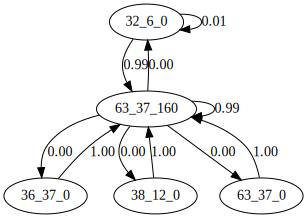

In [32]:
### Show transition graph ###

# to numpy
transition_matrix_np = transition_matrix_df.to_numpy()

node_label = ['32_6_0', '36_37_0', '38_12_0', '63_37_0', '63_37_160']

g = visualise_transition(transition_matrix_np, node_label)
display(g)

#### Channel (CH 37, CH 38, CH 39)

In [34]:
### Generate synthetic data by the Markov model ###

# Define the column which are used for the Markov model (各行を「状態」としてまとめる)
target_df['state'] = list(zip(df['CH 37'], df['CH 38'], df['CH 39']))

# Define the columns names
columns=['CH 37', 'CH 38', 'CH 39']

# Define initial state. The first state of the data is used as the initial state.
initial_state = target_df['state'].iloc[0]

# Generate transition matrix
transition_matrix = generate_transition_matrix(target_df)

# Generate synthetic data
synthetic_data_channel_df = generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns)
synthetic_data_channel_df

,CH 37,CH 38,CH 39
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [35]:
### Convert transition matrix to data frame ###
print("chanel")
transition_matrix_df = transition_matrix_to_dataframe(transition_matrix)
transition_matrix_df

chanel


,"(0, 0, 1)","(0, 1, 0)","(1, 0, 0)"
"(0, 0, 1)",0.099874,0.305078,0.595048
"(0, 1, 0)",0.099930,0.298812,0.601258
"(1, 0, 0)",0.098696,0.295882,0.605421


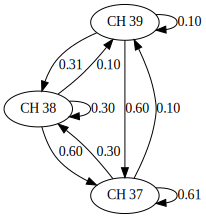

In [36]:
### Show transition graph ###

# to numpy
transition_matrix_np = transition_matrix_df.to_numpy()

node_label = ['CH 39', 'CH 38', 'CH 37']

g = visualise_transition(transition_matrix_np, node_label)
display(g)

#### AD type (AD Flags, AD Service Data - 16 bit UUID, AD 16-bit Service Class UUIDs (incomplete), AD Other)

In [37]:
### Generate synthetic data by the Markov model ###

# Define the column which are used for the Markov model (各行を「状態」としてまとめる)
target_df['state'] = list(zip(df['AD Flags'], df['AD Service Data - 16 bit UUID'], df['AD 16-bit Service Class UUIDs (incomplete)'], df['AD Other']))

# Define the columns names
columns=['AD Flags', 'AD Service Data - 16 bit UUID', 'AD 16-bit Service Class UUIDs (incomplete)', 'AD Other']

# Define initial state. The first state of the data is used as the initial state.
initial_state = target_df['state'].iloc[0]

# Generate transition matrix
transition_matrix = generate_transition_matrix(target_df)

# Generate synthetic data
synthetic_data_ad_df = generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns)
synthetic_data_ad_df

,AD Flags,AD Service Data - 16 bit UUID,AD 16-bit Service Class UUIDs (incomplete),AD Other
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
5,1,1,1,0
6,1,1,1,0
7,1,1,1,0
8,1,1,1,0
9,1,1,1,0


In [38]:
### Convert transition matrix to data frame ###
print("AD type")
transition_matrix_df = transition_matrix_to_dataframe(transition_matrix)
transition_matrix_df

AD type


,"(0, 0, 0, 0)","(1, 0, 0, 0)","(1, 0, 0, 1)","(1, 0, 1, 1)","(1, 0, 1, 2)","(1, 1, 1, 0)"
"(0, 0, 0, 0)",0.005263,0.000000,0.000000,0.000000,0.000000,0.994737
"(1, 0, 0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
"(1, 0, 0, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
"(1, 0, 1, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
"(1, 0, 1, 2)",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
"(1, 1, 1, 0)",0.007931,0.000462,0.000042,0.000126,0.000042,0.991398


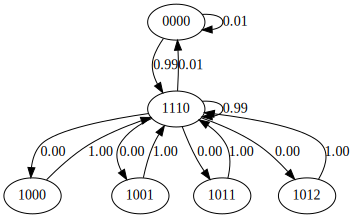

In [40]:
### Show transition graph ###

# to numpy
transition_matrix_np = transition_matrix_df.to_numpy()

node_label = ['0000', '1000', '1001', '1011', '1012', '1110']

g = visualise_transition(transition_matrix_np, node_label)
display(g)

#### UUID (UUID Samsug, UUID Other?)

In [41]:
### Generate synthetic data by the Markov model ###

# Define the column which are used for the Markov model (各行を「状態」としてまとめる)
target_df['state'] = list(zip(df['UUID Samsung'], df['UUID Other']))

# Define the columns names
columns=['UUID Samsung', 'UUID Other']

# Define initial state. The first state of the data is used as the initial state.
initial_state = target_df['state'].iloc[0]

# Generate transition matrix
transition_matrix = generate_transition_matrix(target_df)

# Generate synthetic data
synthetic_data_uuid_df = generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns)
synthetic_data_uuid_df

,UUID Samsung,UUID Other
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
6,2,0
7,2,0
8,2,0
9,2,0


In [42]:
### Convert transition matrix to data frame ###
print("UUID type")
transition_matrix_df = transition_matrix_to_dataframe(transition_matrix)
transition_matrix_df

UUID type


,"(0, 0)","(0, 1)","(1, 0)","(1, 1)","(2, 0)"
"(0, 0)",0.004950,0.000000,0.000000,0.000000,0.995050
"(0, 1)",0.000000,0.000000,0.000000,0.000000,1.000000
"(1, 0)",0.000000,0.000000,0.000000,0.000000,1.000000
"(1, 1)",0.000000,0.000000,0.000000,0.000000,1.000000
"(2, 0)",0.008435,0.000084,0.000084,0.000084,0.991313


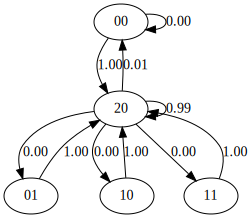

In [43]:
### Show transition graph ###

# to numpy
transition_matrix_np = transition_matrix_df.to_numpy()

node_label = ['00', '01', '10', '11', '20']

g = visualise_transition(transition_matrix_np, node_label)
display(g)

#### PDU tyep (PDU ADV_IND, PDU Other)

In [44]:
### Generate synthetic data by the Markov model ###

# Define the column which are used for the Markov model (各行を「状態」としてまとめる)
target_df['state'] = list(zip(df['PDU ADV_IND'], df['PDU Other']))

# Define the columns names
columns=['PDU ADV_IND', 'PDU Other']

# Define initial state. The first state of the data is used as the initial state.
initial_state = target_df['state'].iloc[0]

# Generate transition matrix
transition_matrix = generate_transition_matrix(target_df)

# Generate synthetic data
synthetic_data_pdu_df = generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns)
synthetic_data_pdu_df


,PDU ADV_IND,PDU Other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [45]:
### Convert transition matrix to data frame ###
print("PDU type")
transition_matrix_df = transition_matrix_to_dataframe(transition_matrix)
transition_matrix_df

PDU type


,"(0, 1)","(1, 0)"
"(0, 1)",0.005263,0.994737
"(1, 0)",0.007926,0.992074


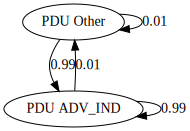

In [46]:
### Show transition graph ###

# to numpy
transition_matrix_np = transition_matrix_df.to_numpy()

node_label = ['PDU Other', 'PDU ADV_IND']

g = visualise_transition(transition_matrix_np, node_label)
display(g)

#### SmartTag type (ST 5, ST Other?)

In [47]:
### Generate synthetic data by the Markov model ###

# Define the column which are used for the Markov model (各行を「状態」としてまとめる)
target_df['state'] = list(zip(df['ST 5'], df['ST Other']))

# Define the columns names
columns=['ST 5', 'ST Other']

# Define initial state. The first state of the data is used as the initial state.
initial_state = target_df['state'].iloc[0]

# Generate transition matrix
transition_matrix = generate_transition_matrix(target_df)

# Generate synthetic data
synthetic_data_st_df = generate_synthetic_data_by_mm(seed, transition_matrix, number_of_synthetic_data, initial_state, columns)
synthetic_data_st_df

,ST 5,ST Other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [48]:
### Convert transition matrix to data frame ###
print("SmartTag type")
transition_matrix_df = transition_matrix_to_dataframe(transition_matrix)
transition_matrix_df

SmartTag type


,"(0, 0)","(0, 1)","(1, 0)"
"(0, 0)",0.004854,0.000000,0.995146
"(0, 1)",0.000000,0.000000,1.000000
"(1, 0)",0.008603,0.000042,0.991355


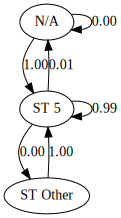

In [49]:
### Show transition graph ###

# to numpy
transition_matrix_np = transition_matrix_df.to_numpy()

node_label = ['N/A', 'ST Other', 'ST 5']

g = visualise_transition(transition_matrix_np, node_label)
display(g)

### Finalising

In [55]:
# 全て同じ値のカラムの合成データを作成
# generate data frame with all the same value columns for which has only unique value


columns = [
    "Length MS Data",
    "AD Manufacturer Specific",
    "AD Tx Power Level",
    "AD 16-bit Service Class UUIDs",
    "COMP Apple",
    "COMP Other",
    "UUID Tile",
    "PDU ADV_NONCONN_IND",
    "PDU ADV_SCAN_IND",
    "CT 07",
    "CT 12",
    "CT Other",
    "ST 3"
]

synthetic_data_df = pd.DataFrame(
    0,  # Initial value for all cells
    index=range(number_of_synthetic_data),  # Number of rows
    columns=columns  # Column names
)

synthetic_data_df["Label"] = "SmartTag (nearby)"

synthetic_data_df

,Length MS Data,AD Manufacturer Specific,AD Tx Power Level,AD 16-bit Service Class UUIDs,COMP Apple,COMP Other,UUID Tile,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,CT 07,CT 12,CT Other,ST 3,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
1,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
2,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
3,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
4,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
5,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
6,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
7,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
8,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)
9,0,0,0,0,0,0,0,0,0,0,0,0,0,SmartTag (nearby)


In [56]:
# merge synthetic data to one data frame

synthetic_data_df = pd.concat(
    [
        synthetic_data_df,
        synthetic_data_length_df,
        synthetic_data_channel_df,
        synthetic_data_ad_df,
        synthetic_data_uuid_df,
        synthetic_data_pdu_df,
        synthetic_data_st_df
    ],
    axis=1
)

synthetic_data_df

,Length MS Data,AD Manufacturer Specific,AD Tx Power Level,AD 16-bit Service Class UUIDs,COMP Apple,COMP Other,UUID Tile,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,CT 07,...,AD Flags,AD Service Data - 16 bit UUID,AD 16-bit Service Class UUIDs (incomplete),AD Other,UUID Samsung,UUID Other,PDU ADV_IND,PDU Other,ST 5,ST Other
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,0,1,0,1,0


In [57]:
# Reorder synthetic_data_df columns to match df columns
synthetic_data_df = synthetic_data_df[df.columns]
synthetic_data_df

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
5,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
6,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
7,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
8,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
9,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
